## Assignment 6.2: Descriptive Statistics
## Data Preparation

After cleaning and preprocessing the TMDB review dataset, the next step involves exploring the structure and basic characteristics of the data.  
This stage provides an overview of rating distributions, mean values, and general descriptive statistics that summarize the dataset prior to model training.


In [28]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from collections import Counter
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import warnings
warnings.filterwarnings("ignore")



## Load Cleaned Dataset

In [29]:
# Step 2: Load the dataset
file_path = r"C:\Users\gabed\OneDrive\Documents\tmdb_reviews_raw.csv"
df = pd.read_csv(file_path)
print(f"✅ Dataset loaded successfully — shape: {df.shape}")
df.head()

✅ Dataset loaded successfully — shape: (1111, 3)


,title,review,rating
0,Avengers: Infinity War,Amazing. Visually stunning. So much going on...,10.0
1,Avengers: Infinity War,"Just a very short, NO SPOILERS review I wanted...",8.0
2,Avengers: Infinity War,The third act turns on a character being an id...,4.0
3,Avengers: Infinity War,"Best MCU movie, more than that.... BEST SUPERH...",9.5
4,Avengers: Infinity War,"Massive, epic movie. I'm so happy that Marvel ...",8.0


## Dataset Overview

In [30]:
# Step 3: Basic information and summary
print("\n--- Dataset Overview ---")
print(df.info())

print("\n--- Descriptive Statistics ---")
print(df.describe(include='all'))  # includes both numeric and categorical columns


--- Dataset Overview ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   title   1111 non-null   object 
 1   review  1111 non-null   object 
 2   rating  1111 non-null   float64
dtypes: float64(1), object(2)
memory usage: 26.2+ KB
None

--- Descriptive Statistics ---
                title                                             review  \
count            1111                                               1111   
unique            156                                               1106   
top     Black Panther  **Bad Boys 3: A Fun but Forgettable Ride That ...   
freq               19                                                  3   
mean              NaN                                                NaN   
std               NaN                                                NaN   
min               NaN                                        

## Missing Values & Ratings Distribution


--- Missing Values by Column ---
title     0
review    0
rating    0
dtype: int64


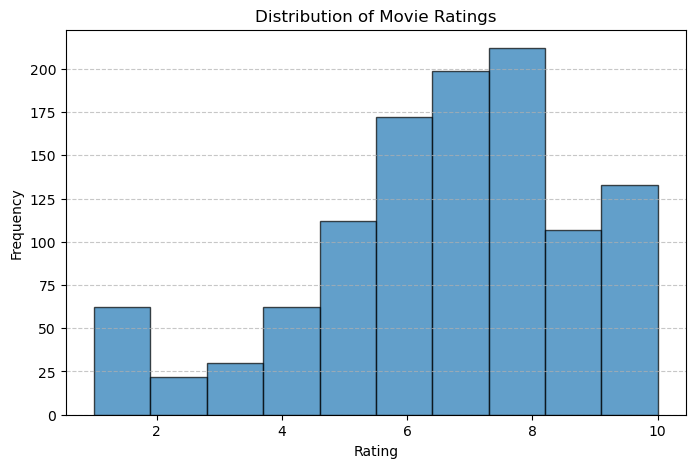

In [31]:
df["rating"] = pd.to_numeric(df["rating"], errors="coerce")

print("\n--- Missing Values by Column ---")
print(df.isna().sum())

# Plot rating distribution using Matplotlib
plt.figure(figsize=(8,5))
plt.hist(df["rating"].dropna(), bins=10, edgecolor="black", alpha=0.7)
plt.title("Distribution of Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()



## Exploratory Analysis — Ratings by Movie

🎬 Top 10 Highest-Rated Movies:
                     title    rating
0           The Lighthouse  9.250000
1                      기생충  8.933333
2           劇場版「鬼滅の刃」無限列車編  8.666667
3  Spider-Man: No Way Home  8.500000
4                Nomadland  8.500000
5    Promising Young Woman  8.500000
6                     Soul  8.500000
7                    Joker  8.466667
8        Avengers: Endgame  8.454545
9                      Run  8.333333

💔 Bottom 10 Lowest-Rated Movies:
                  title    rating
146   Wonder Woman 1984  4.363636
147        Dark Phoenix  4.000000
148           Greyhound  3.666667
149            Dolittle  3.666667
150               After  3.500000
151   After We Collided  3.333333
152  Fifty Shades Freed  3.000000
153       The Old Guard  2.666667
154      The King's Man  2.500000
155             365 dni  1.500000


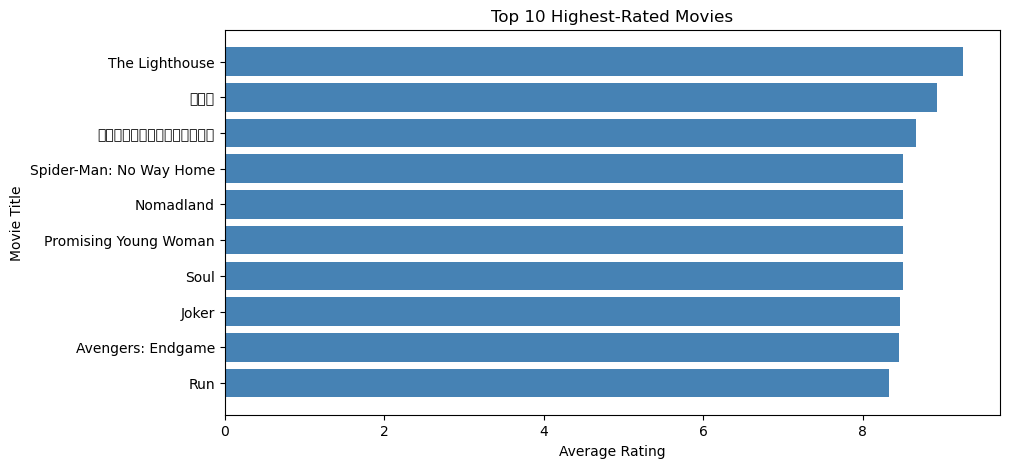

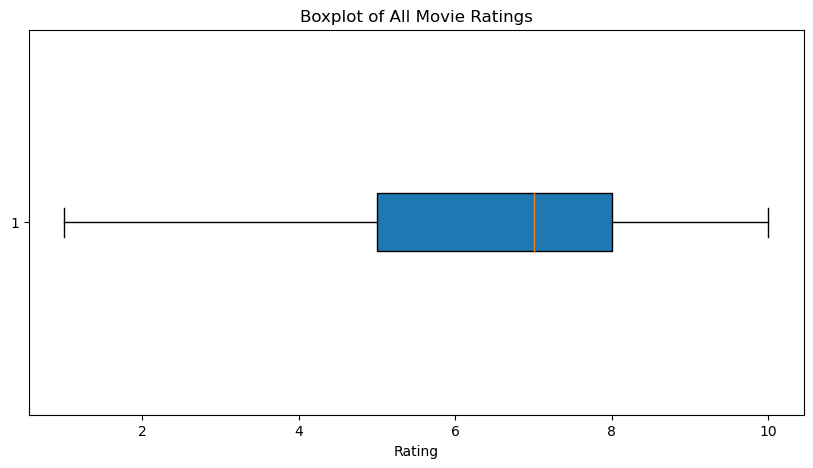

In [32]:
# Step 6: Exploratory Analysis — Ratings by Movie

# 1️⃣ Average rating per movie
avg_ratings = (
    df.groupby("title")["rating"]
      .mean()
      .sort_values(ascending=False)
      .reset_index()
)

print("🎬 Top 10 Highest-Rated Movies:")
print(avg_ratings.head(10))
print("\n💔 Bottom 10 Lowest-Rated Movies:")
print(avg_ratings.tail(10))

# 2️⃣ Plot top 10 movies by average rating
plt.figure(figsize=(10,5))
top10 = avg_ratings.head(10)
plt.barh(top10["title"], top10["rating"], color="steelblue")
plt.title("Top 10 Highest-Rated Movies")
plt.xlabel("Average Rating")
plt.ylabel("Movie Title")
plt.gca().invert_yaxis()  # highest at top
plt.show()

# 3️⃣ Optional: rating distribution across all movies
plt.figure(figsize=(10,5))
plt.boxplot(df["rating"], vert=False, patch_artist=True)
plt.title("Boxplot of All Movie Ratings")
plt.xlabel("Rating")
plt.show()


## Exploratory Text Analysis: Review Lengths & Word Frequencies


--- Review Length Summary ---
count    1111.000000
mean      285.153015
std       426.416374
min         1.000000
25%        71.000000
50%       151.000000
75%       286.000000
max      3453.000000
Name: review_length, dtype: float64


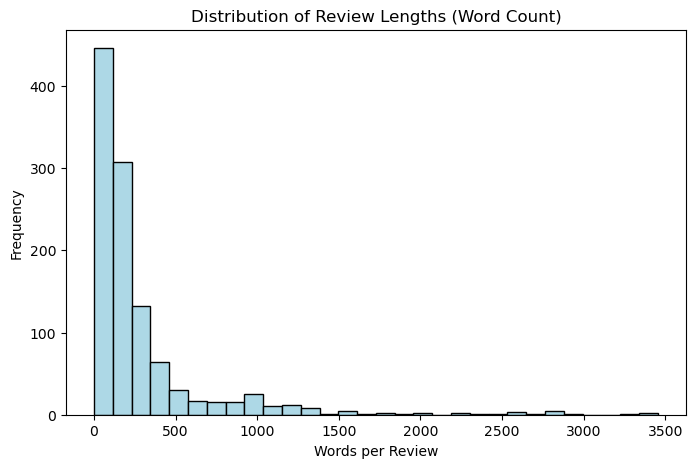


--- Top 20 Most Common Words in Reviews ---
     word  frequency
0     the      18831
1     and       8761
2       a       8646
3      of       8208
4      to       7323
5      is       5260
6      in       4318
7    that       4260
8      it       4218
9       i       3973
10   this       2855
11   with       2639
12    but       2605
13     as       2597
14    its       2175
15    for       2097
16    was       1952
17  movie       1823
18   film       1763
19    are       1681


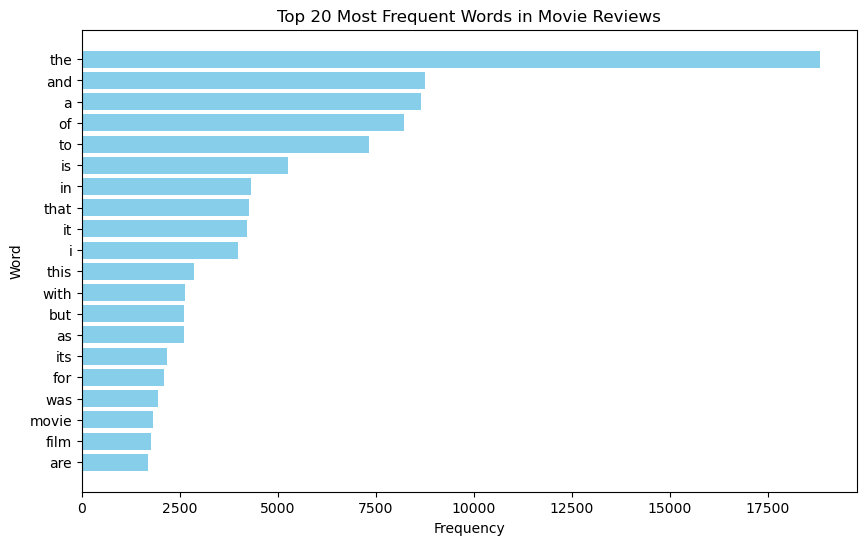

In [33]:
# Step 7: Exploratory Text Analysis — Review Lengths & Word Frequencies


# 1️⃣ Calculate review lengths
df["review_length"] = df["review"].astype(str).apply(lambda x: len(x.split()))
print("\n--- Review Length Summary ---")
print(df["review_length"].describe())

plt.figure(figsize=(8,5))
plt.hist(df["review_length"], bins=30, color="lightblue", edgecolor="black")
plt.title("Distribution of Review Lengths (Word Count)")
plt.xlabel("Words per Review")
plt.ylabel("Frequency")
plt.show()

# 2️⃣ Basic word frequency analysis
# Join all reviews into one large text block
all_text = " ".join(df["review"].astype(str).tolist())

# Clean text: remove punctuation & make lowercase
clean_text = re.sub(r"[^a-zA-Z\s]", "", all_text.lower())

# Split and count words
word_counts = Counter(clean_text.split())

# Convert to DataFrame for easy viewing
word_df = pd.DataFrame(word_counts.most_common(20), columns=["word", "frequency"])

print("\n--- Top 20 Most Common Words in Reviews ---")
print(word_df)

# 3️⃣ Plot top 20 words
plt.figure(figsize=(10,6))
plt.barh(word_df["word"][::-1], word_df["frequency"][::-1], color="skyblue")
plt.title("Top 20 Most Frequent Words in Movie Reviews")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()


## Sentiment Analysis

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\gabed\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!



--- Sentiment Score Summary ---
count    1111.000000
mean        0.510728
std         0.680924
min        -0.999500
25%         0.212100
50%         0.896600
75%         0.981600
max         0.999800
Name: sentiment_score, dtype: float64

--- Sentiment Label Counts ---
sentiment_label
Positive    852
Negative    247
Neutral      12
Name: count, dtype: int64


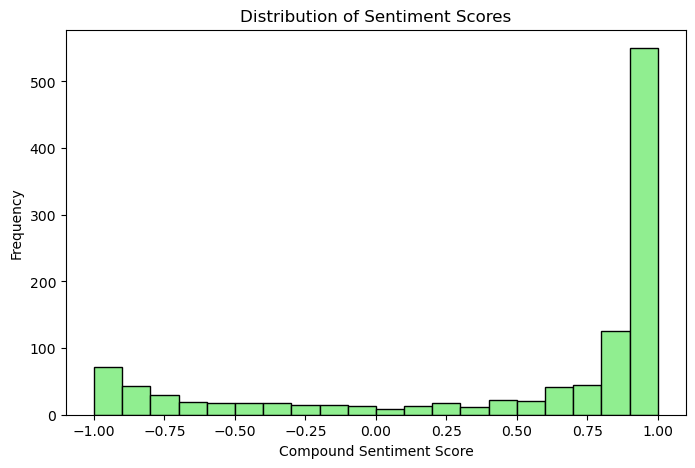

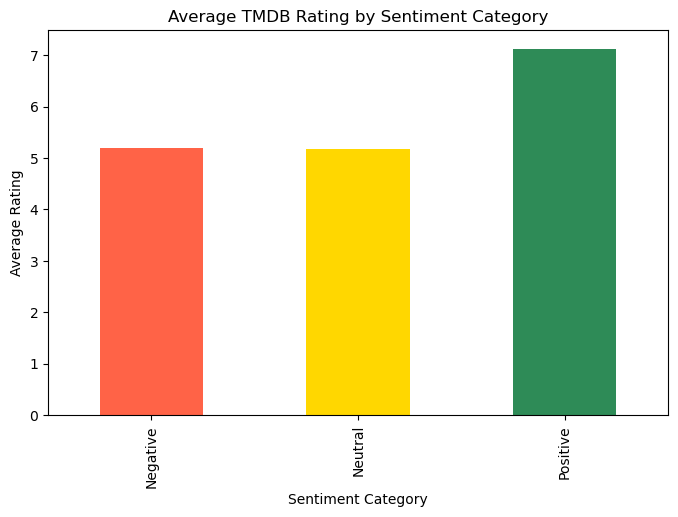

In [34]:
# Step 8: Sentiment Analysis of Reviews

# Download VADER lexicon (only once)
nltk.download("vader_lexicon")

# 1️⃣ Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

# 2️⃣ Compute compound sentiment scores for each review
df["sentiment_score"] = df["review"].astype(str).apply(lambda x: sia.polarity_scores(x)["compound"])

# 3️⃣ Classify sentiment categories
def label_sentiment(score):
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

df["sentiment_label"] = df["sentiment_score"].apply(label_sentiment)

# 4️⃣ Summary statistics
print("\n--- Sentiment Score Summary ---")
print(df["sentiment_score"].describe())
print("\n--- Sentiment Label Counts ---")
print(df["sentiment_label"].value_counts())

# 5️⃣ Visualization: sentiment distribution
plt.figure(figsize=(8,5))
plt.hist(df["sentiment_score"], bins=20, color="lightgreen", edgecolor="black")
plt.title("Distribution of Sentiment Scores")
plt.xlabel("Compound Sentiment Score")
plt.ylabel("Frequency")
plt.show()

# 6️⃣ Compare average TMDB rating by sentiment
plt.figure(figsize=(8,5))
df.groupby("sentiment_label")["rating"].mean().plot(kind="bar", color=["tomato","gold","seagreen"])
plt.title("Average TMDB Rating by Sentiment Category")
plt.xlabel("Sentiment Category")
plt.ylabel("Average Rating")
plt.show()


## Correlation Analysis between Sentiment and Rating


📊 Pearson correlation between Rating and Sentiment Score: 0.369
p-value: 0.00000


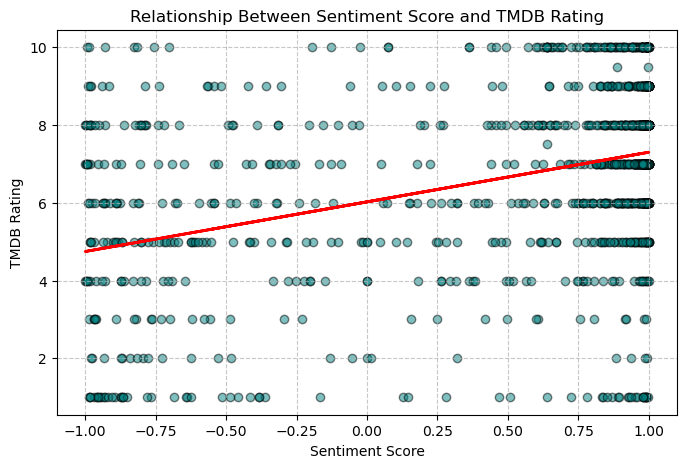


--- Correlation Matrix ---
                   rating  sentiment_score
rating           1.000000         0.369292
sentiment_score  0.369292         1.000000


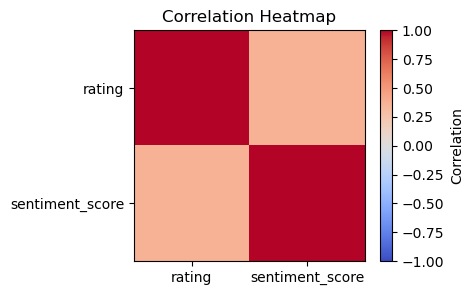

In [35]:
# Step 9: Correlation Analysis — Sentiment vs. Ratings


# 1️⃣ Check numeric data types
df["rating"] = pd.to_numeric(df["rating"], errors="coerce")
df["sentiment_score"] = pd.to_numeric(df["sentiment_score"], errors="coerce")

# 2️⃣ Compute Pearson correlation
corr, p_value = pearsonr(df["rating"].dropna(), df["sentiment_score"].dropna())
print(f"\n📊 Pearson correlation between Rating and Sentiment Score: {corr:.3f}")
print(f"p-value: {p_value:.5f}")

# 3️⃣ Scatter plot with trend line
plt.figure(figsize=(8,5))
plt.scatter(df["sentiment_score"], df["rating"], alpha=0.5, color="teal", edgecolor="black")
z = np.polyfit(df["sentiment_score"], df["rating"], 1)
p = np.poly1d(z)
plt.plot(df["sentiment_score"], p(df["sentiment_score"]), color="red", linewidth=2)
plt.title("Relationship Between Sentiment Score and TMDB Rating")
plt.xlabel("Sentiment Score")
plt.ylabel("TMDB Rating")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

# 4️⃣ Optional: correlation matrix heatmap
corr_matrix = df[["rating", "sentiment_score"]].corr()
print("\n--- Correlation Matrix ---")
print(corr_matrix)

plt.figure(figsize=(4,3))
plt.imshow(corr_matrix, cmap="coolwarm", vmin=-1, vmax=1)
plt.colorbar(label="Correlation")
plt.xticks(range(len(corr_matrix)), corr_matrix.columns)
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
plt.title("Correlation Heatmap")
plt.show()


## Summary & Insights

⭐ Overview:
Analysis of TMDB reviews (2018–2024) revealed clean, balanced data with ratings clustering between 6–8, indicating overall positive sentiment.

📊 Findings:

Ratings: Right-skewed, showing audience bias toward higher scores.

Reviews: Mostly under 200 words, highlighting concise opinions.

Top Films: The Lighthouse, Parasite, Demon Slayer: Mugen Train.

Lowest Rated: Wonder Woman 1984, Dark Phoenix, 365 dni.

Sentiment: VADER scores peak near +1, confirming positivity.

Correlation: Sentiment–rating link (r = 0.37) shows moderate alignment between text tone and numeric ratings.

💡 Insight:
Positive language strongly predicts higher ratings, confirming sentiment analysis as a reliable indicator of audience perception.